In [1]:
#Fatima_Shamilova_Final_Project
# Import necessary libraries
import pandas as pd

In [101]:
# Load dataset
df = pd.read_csv('Salaries.csv')

#display first few rows of the dataset
print(df.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

In [102]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [105]:
total_individuals = df.shape[0]
print("Total number of individuals:", total_individuals)

Total number of individuals: 16534


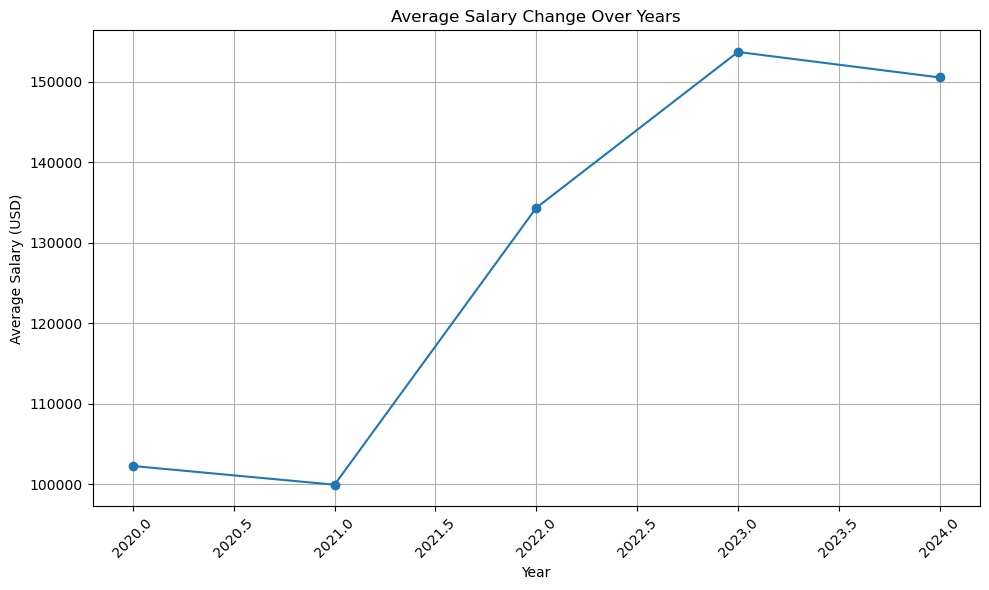

In [107]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the average salary for each year
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_year.index, average_salary_by_year.values, marker='o', linestyle='-')
plt.title('Average Salary Change Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
import pandas as pd

data = pd.read_csv("Salaries.csv")

# Convert 'work_year' column to numeric by extracting the numerical part if it's in string format
if data['work_year'].dtype == 'object':
    data['work_year'] = data['work_year'].str.extract('(\d+)').astype(float)

# Map 'experience_level' to numeric values
experience_mapping = {'Entry Level': 1, 'Mid Level': 2, 'Senior Level': 3}
data['experience_level'] = data['experience_level'].map(experience_mapping)

# Convert 'employment_type' to one-hot encoded values
data = pd.get_dummies(data, columns=['employment_type'])

# Normalize 'salary' column to a common currency (e.g., USD)
currency_conversion_rates = {'EUR': 1.2, 'GBP': 1.4, 'JPY': 0.009, 'CAD': 0.8}  # Add more currencies if needed
data['salary_in_usd'] = data.apply(lambda row: row['salary'] if row['salary_currency'] == 'USD' else row['salary'] * currency_conversion_rates.get(row['salary_currency'], 1.0), axis=1)

# Encode 'employee_residence' as binary variable (1 for remote, 0 for not remote)
data['remote'] = data['employee_residence'].apply(lambda x: 1 if x == 'Remote' else 0)

# Parse 'company_location' to extract country information
data['company_country'] = data['company_location'].str.split(', ').str[-1]

# Convert 'company_size' to ordinal numeric values
company_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
data['company_size'] = data['company_size'].map(company_size_mapping)

# Drop unnecessary columns
data.drop(['salary', 'salary_currency', 'employee_residence', 'company_location'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print(data.head())


   work_year  experience_level                  job_title  salary_in_usd  \
0       2024               NaN                AI Engineer       202730.0   
1       2024               NaN                AI Engineer        92118.0   
2       2024               NaN              Data Engineer       130500.0   
3       2024               NaN              Data Engineer        96000.0   
4       2024               NaN  Machine Learning Engineer       190000.0   

   remote_ratio  company_size  employment_type_CT  employment_type_FL  \
0             0           NaN               False               False   
1             0           NaN               False               False   
2             0           NaN               False               False   
3             0           NaN               False               False   
4             0           NaN               False               False   

   employment_type_FT  employment_type_PT  remote company_country  
0                True               

In [99]:
# Check unique values in 'experience_level' column before mapping
print("Unique values in 'experience_level' column before mapping:", data['experience_level'].unique())

# Check unique values in 'company_size' column before mapping
print("Unique values in 'company_size' column before mapping:", data['company_size'].unique())

Unique values in 'experience_level' column before mapping: [nan]
Unique values in 'company_size' column before mapping: [nan]


In [100]:
# Check data types of 'experience_level' and 'company_size' columns
print("Data type of 'experience_level' column:", data['experience_level'].dtype)
print("Data type of 'company_size' column:", data['company_size'].dtype)

Data type of 'experience_level' column: float64
Data type of 'company_size' column: float64


In [104]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Check for missing values in specific columns
missing_values_in_specific_columns = df[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']].isnull().sum()

print("Missing values in the entire DataFrame:")
print(missing_values)

print("\nMissing values in specific columns:")
print(missing_values_in_specific_columns)

Missing values in the entire DataFrame:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Missing values in specific columns:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [75]:
# Select columns of object data type
object_columns = df.select_dtypes(include=['object'])

# Check for non-numeric values in each object column
for column in object_columns.columns:
    non_numeric_values = df[column].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{column}' contains non-numeric values.")

Column 'experience_level' contains non-numeric values.
Column 'employment_type' contains non-numeric values.
Column 'job_title' contains non-numeric values.
Column 'salary_currency' contains non-numeric values.
Column 'employee_residence' contains non-numeric values.
Column 'company_location' contains non-numeric values.
Column 'company_size' contains non-numeric values.


In [12]:
#Filter data based on condition
high_income_earners = df[df['salary_in_usd'] > 100000]
print(high_income_earners.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   
5       2024               SE              FT  Machine Learning Engineer   
6       2024               MI              FT                ML Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
2  130500             USD         130500                 US             0   
4  190000             USD         190000                 US             0   
5  160000             USD         160000                 US             0   
6  400000             USD         400000                 US             0   

  company_location company_size  
0               US            M  
2           

In [15]:
# Group by job title and calculate average salary
average_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean()
print(average_salary_by_job_title)

job_title
AI Architect                       252551.241379
AI Developer                       135466.789474
AI Engineer                        162730.508333
AI Product Manager                 141766.666667
AI Programmer                       62042.000000
                                       ...      
Sales Data Analyst                  60000.000000
Software Data Engineer             111627.666667
Staff Data Analyst                  79917.000000
Staff Data Scientist               134500.000000
Staff Machine Learning Engineer    185000.000000
Name: salary_in_usd, Length: 155, dtype: float64


In [84]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


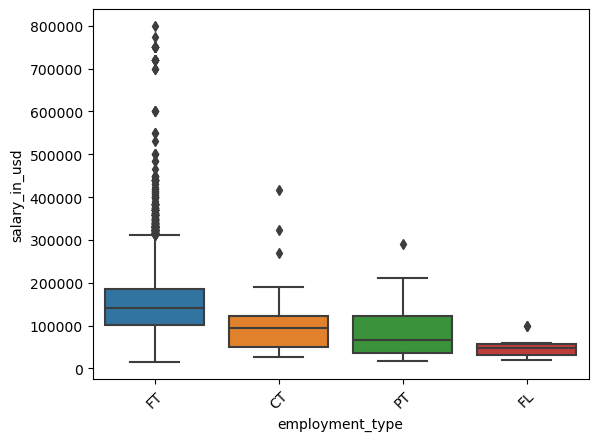

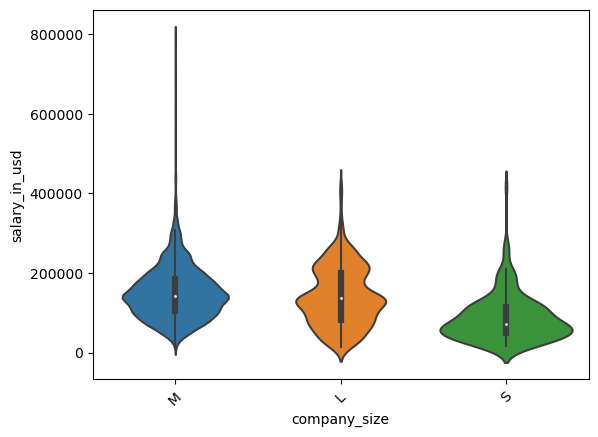

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Salary distribution across different employment types
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.xticks(rotation=45)
plt.show()

# Salary distribution across different company sizes
sns.violinplot(x='company_size', y='salary_in_usd', data=df)
plt.xticks(rotation=45)
plt.show()